# IMMOWEB PROJECT: EXPLORATORY DATA ANALYSIS

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



In [2]:
# Load the dataset
df = pd.read_csv('Data/Cleaned - immoweb-dataset.csv')

numeric_vars = ['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'landSurface',
 'parkingCountIndoor',
 'parkingCountOutdoor',
 'toiletCount',
 'price']


In [3]:
def corPlot(df, str):
    """ 
    Function to plot the correlation of numeric variables
    """

    # Compute correlation
    correlations = df.corr()['price'].drop('price').sort_values(ascending=False)


    # Plot
    plt.figure(figsize=(10, 4))
    sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
    plt.title(f'Correlation of Numeric Variables Against Price - {str}', fontsize=16, fontweight='bold')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('')
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    #plt.savefig(f'plots/correlation/Correlation-Price-{str}', bbox_inches='tight')
    plt.show()


In [4]:
def corMatrix(df, str):
    """
    Showing a heatmap correlation matrix for all numeric variables pairs
    """

    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title(f'Correlation Heatmap - {str}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    #plt.savefig(f'plots/correlation/CorHeatMap-Price-{str}', bbox_inches='tight')
    plt.show()


In [5]:
def pairPlot(df, features, str):
    """"
    Function to make a pairplot for all numeric values
    """
    #plt.figure(figsize=(6, 5))
    sns.pairplot(df, vars = features + ['price'], diag_kind='kde', corner=True)
    plt.suptitle(f"Pairplot of Price and Top 3 Features - {str}", fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    #plt.savefig(f'plots/correlation/CorPairPlot-Price-{str}', bbox_inches='tight')
    plt.show()
    

In [6]:
# List of relevant numeric-like columns (including object types)
features = [col for col in numeric_vars if col != 'price']

# Copy the data and convert object columns to numeric (coerce "no info" to NaN)
df_cleaned = df[features + ['price', 'type']].copy()
for col in features:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Create 2 subsets for House and Apartment
df_house = df_cleaned[df_cleaned['type'] == 'House'].copy()
df_apartment = df_cleaned[df_cleaned['type'] == 'Apartment'].copy()

# Drop the type column for each
df_cleaned = df_cleaned.drop(columns=['type'])
df_house = df_house.drop(columns=['type'])
df_apartment = df_apartment.drop(columns=['type', 'landSurface'])  # also landSurface as Apt dont have



=== CORRELATION PLOT: ALL DATA - HOUSE - APARTMENT ===


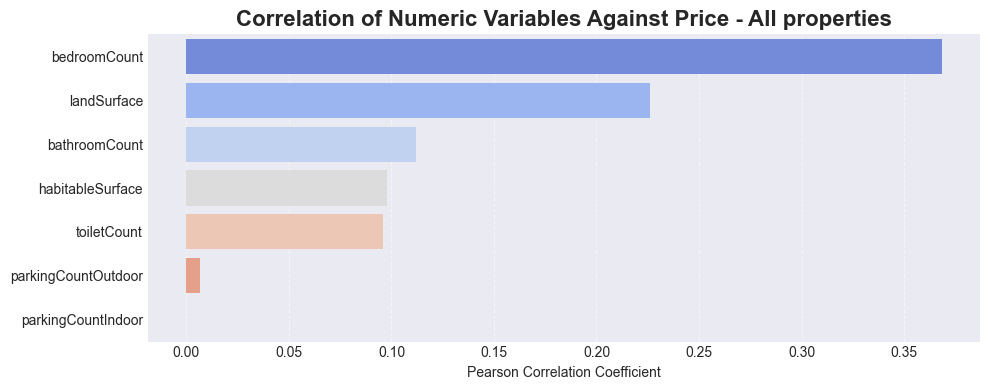

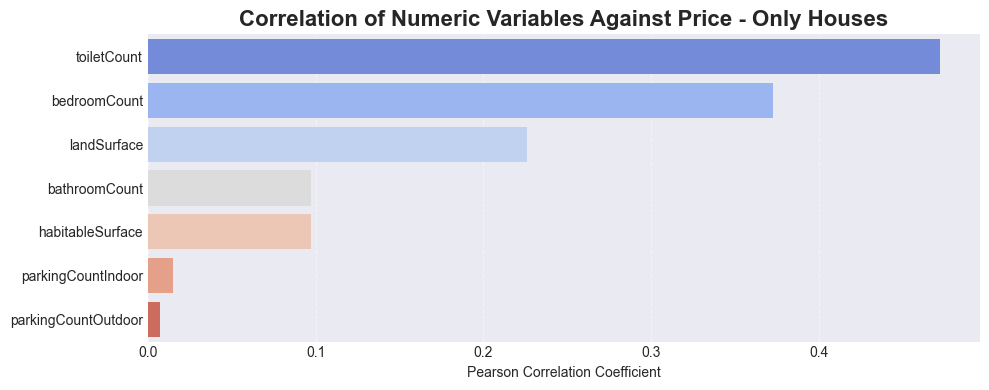

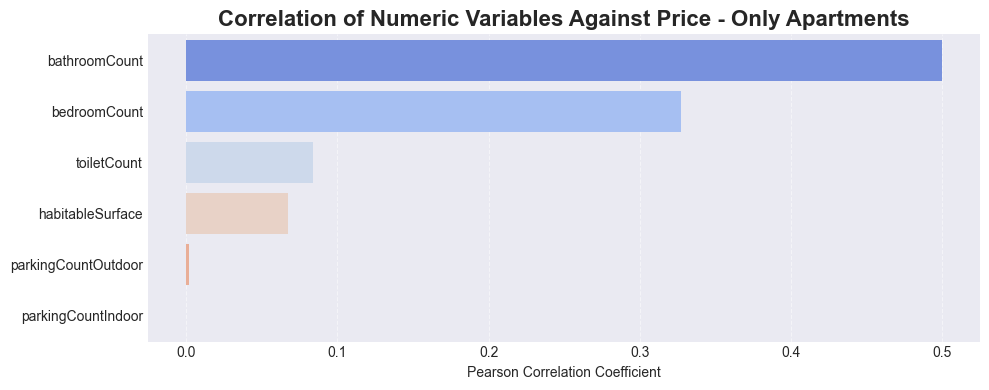

=== CORRELATION MATRIX: ALL DATA - HOUSE - APARTMENT ===


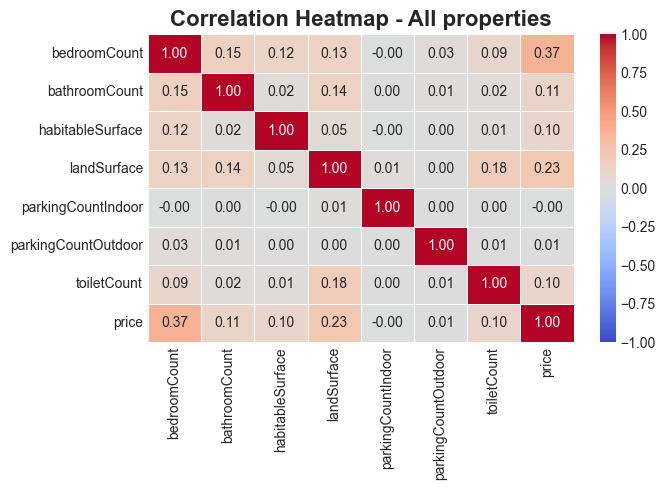

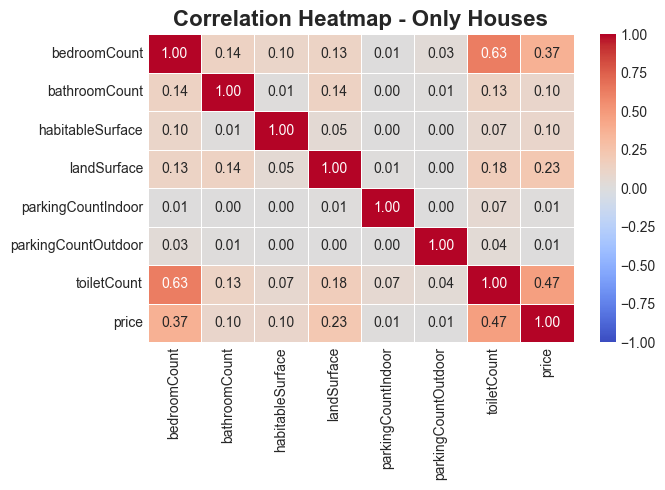

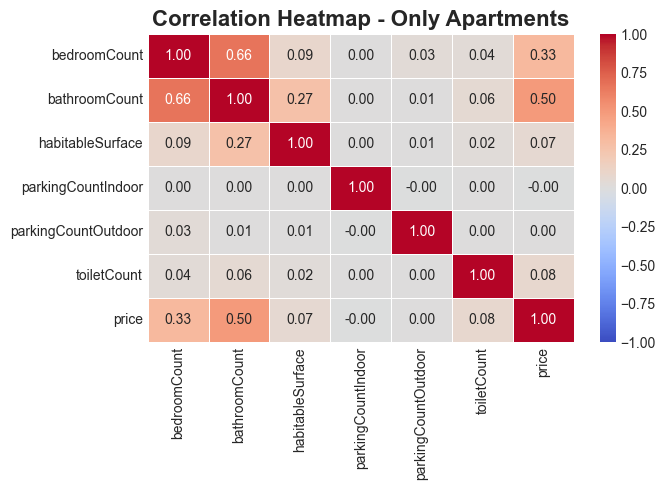

=== PAIRPLOT TOP 3 FEATURES: ALL DATA - HOUSE - APARTMENT ===


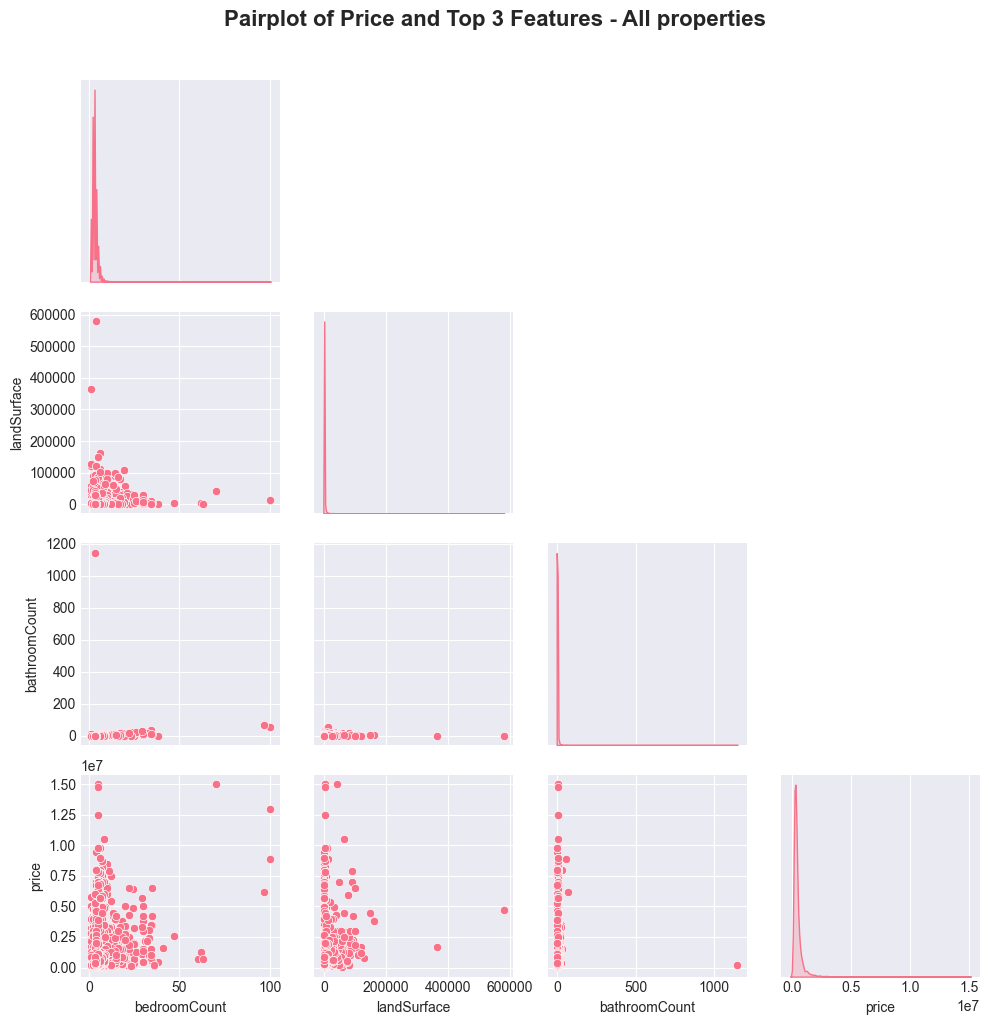

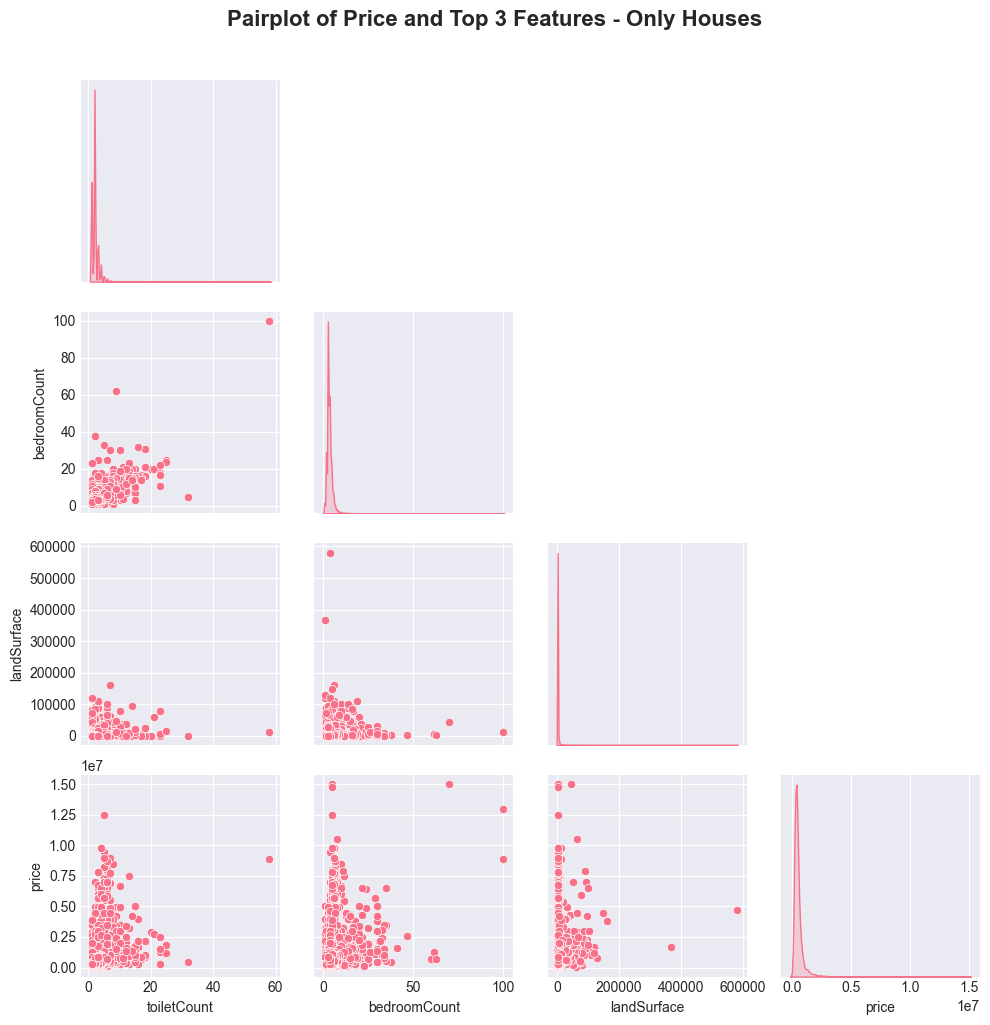

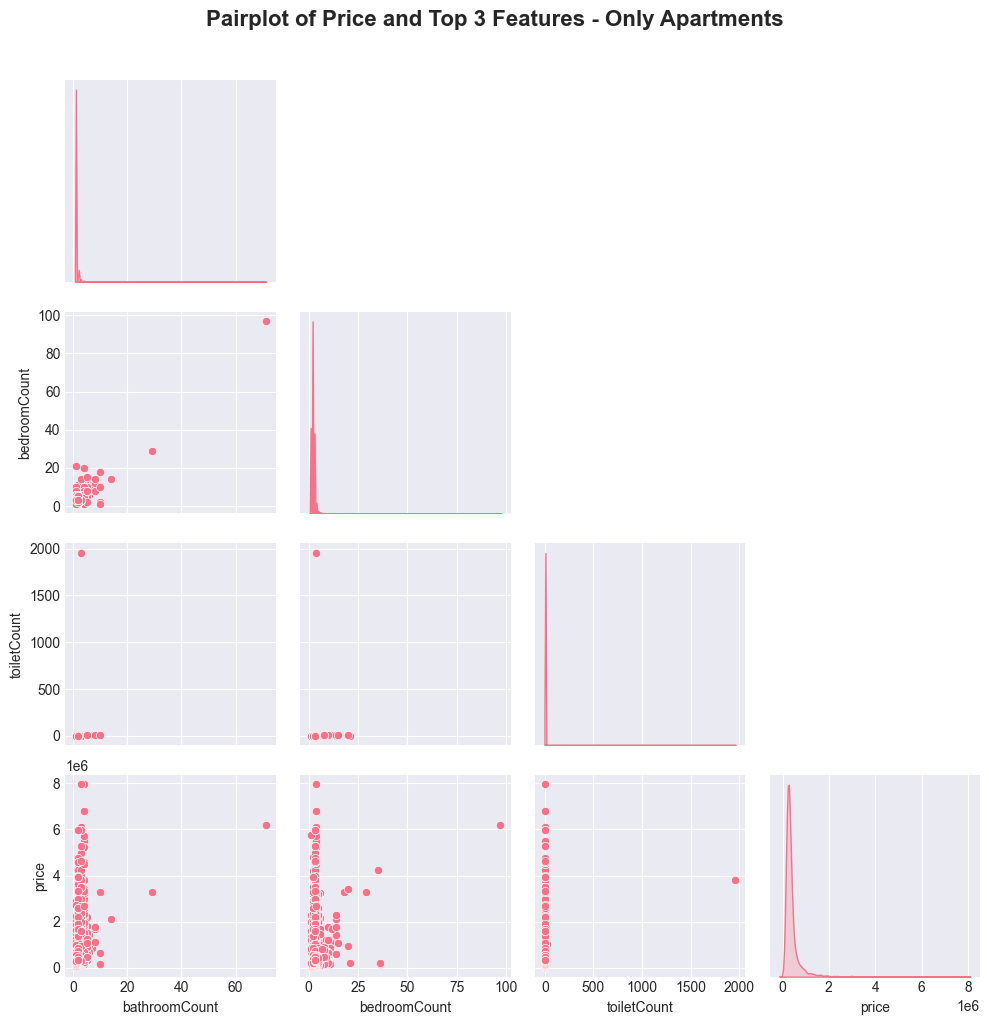

In [7]:
print("=== CORRELATION PLOT: ALL DATA - HOUSE - APARTMENT ===")
corPlot(df_cleaned, "All properties")
corPlot(df_house, "Only Houses")
corPlot(df_apartment, "Only Apartments")

print("=== CORRELATION MATRIX: ALL DATA - HOUSE - APARTMENT ===")
corMatrix(df_cleaned, "All properties")
corMatrix(df_house, "Only Houses")
corMatrix(df_apartment, "Only Apartments")

print("=== PAIRPLOT TOP 3 FEATURES: ALL DATA - HOUSE - APARTMENT ===")
# Pairplot for only the top 3 most correlated
top3_features = df_cleaned.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_cleaned, top3_features, "All properties")

top3_house = df_house.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_house, top3_house, "Only Houses")

top3_apartment = df_apartment.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_apartment, top3_apartment, "Only Apartments")


In [8]:
maxPriceCor = max(
    df_cleaned.corr()['price'].drop('price').sort_values(ascending=False)
)

minPriceCor = min(
    df_cleaned.corr()['price'].drop('price').sort_values(ascending=False)
)

PriceCorHouse = df_house.corr()['price'].drop('price').sort_values(ascending=False).head(2)

PriceCorApt = df_apartment.corr()['price'].drop('price').sort_values(ascending=False).head(2)

#corr_matrix_house = df_house.corr()
maxCorHouse = df_house.corr().where(~np.eye(df_house.corr().shape[0], dtype=bool)).max().max()
maxCorApt = df_apartment.corr().where(~np.eye(df_apartment.corr().shape[0], dtype=bool)).max().max()

df_cleaned['parking'] = df.parkingCountIndoor + df.parkingCountOutdoor
parkingCor = df_cleaned.corr()['price']['parking']


# # Pairplot for only the top 3 most correlated
# top3_features = df_cleaned.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
# pairPlot(df_cleaned, top3_features, "All properties")

# top3_house = df_house.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
# pairPlot(df_house, top3_house, "Only Houses")

# top3_apartment = df_apartment.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
# pairPlot(df_apartment, top3_apartment, "Only Apartments")

print(f"""
      Looking at correlation against price, we don't find strong correlations.
      The highest one being with bedroomCount {maxPriceCor:.2f}.
 
      If we split the data between houses and apartments, we find stronger correlations:
      For Houses, the correlation with bedroomCount ({PriceCorHouse[1]:.2f}) is lower than with toiletCount ({PriceCorHouse[0]:.2f}).
      For Apartments, the correlation with bedroomCount ({PriceCorApt[1]:.2f}) is lower than with bathroomCount ({PriceCorApt[0]:.2f}).
      """)


print(f"""
      Looking at other variables correlation, we still have no strong correlations but when we split the data:
      For Houses, the correlation between bedroomCount and toiletCount is {maxCorHouse:.2f}.
      For Apartments, the correlation between bedroomCount and bathroomCount is {maxCorApt:.2f}.
      """)

print(f"""
      Another insteresting aspect is the almost null correlation between price and parking variables ({minPriceCor:.2f}).
      If we combine indoor and outdoor parking, then the correlation with price increases to {parkingCor:.2f}
      Which still is very low.
      """)

print("""
      For our model, we may think about combining bathroom and toilet counts
      """)


      Looking at correlation against price, we don't find strong correlations.
      The highest one being with bedroomCount 0.37.

      If we split the data between houses and apartments, we find stronger correlations:
      For Houses, the correlation with bedroomCount (0.37) is lower than with toiletCount (0.47).
      For Apartments, the correlation with bedroomCount (0.33) is lower than with bathroomCount (0.50).
      

      Looking at other variables correlation, we still have no strong correlations but when we split the data:
      For Houses, the correlation between bedroomCount and toiletCount is 0.63.
      For Apartments, the correlation between bedroomCount and bathroomCount is 0.66.
      

      Another insteresting aspect is the almost null correlation between price and parking variables (-0.00).
      If we combine indoor and outdoor parking, then the correlation with price increases to 0.01
      Which still is very low.
      

      For our model, we may think ab